In [1]:
import h5py as h5
import matplotlib.pyplot as plt
import numpy as np 
import time
from IPython.display import display, clear_output

In [2]:
rukamayRVI = 'Mascaras/S1A_OPER_SAR_EOSSP__CORE_L1A_OLF_20210726T185307_Spk_EC_BandMath.h5'
anguilRVI = 'Mascaras/S1A_OPER_SAR_EOSSP__CORE_L1A_ARG-1_OLVF_20210618T143634_Spk_EC_BandMath.h5'
barrancosaRVI = 'Mascaras/S1A_OPER_SAR_EOSSP__CORE_L1A_OLF_20210930T172207_Spk_EC_BandMath.h5'

# anguil = 'Amp-Phi_EC_Spk/S1A_OPER_SAR_EOSSP__CORE_L1A_ARG-1_OLVF_20210618T143634_Spk_EC.h5'

anguil1RVI = 'rvi/S1A_OPER_SAR_EOSSP__CORE_L1A_OLF_20210920T203906_Spk_EC_BandMath.h5'
rukamay1RVI = 'rvi/S1A_OPER_SAR_EOSSP__CORE_L1A_ARG-1_OLF_20201102T185012_Spk_EC.h5'
rukamay5RVI = 'rvi/S1A_OPER_SAR_EOSSP__CORE_L1A_OLF_20210629T143051_Spk_EC_BandMath.h5'
rukamay6RVI = 'rvi/S1A_OPER_SAR_EOSSP__CORE_L1A_OLF_20210725T151829_Spk_EC_BandMath.h5' 
rukamay7RVI = 'rvi/S1A_OPER_SAR_EOSSP__CORE_L1A_OLF_20210726T185307_Spk_EC_BandMath.h5'

barrancosa1RVI = 'rvi/S1A_OPER_SAR_EOSSP__CORE_L1A_ARG-1_OLF_20200602T170443_Spk_EC_BandMath.h5'
barrancosa2RVI = 'rvi/S1A_OPER_SAR_EOSSP__CORE_L1A_ARG-1_OLF_20201104T141147_Spk_EC_BandMath.h5'

In [13]:
im = h5.File(barrancosa2RVI,'r')
# im['bands']['RVI_EC'].shape

In [4]:
im['bands'].keys()

<KeysViewHDF5 ['RVI_EC']>

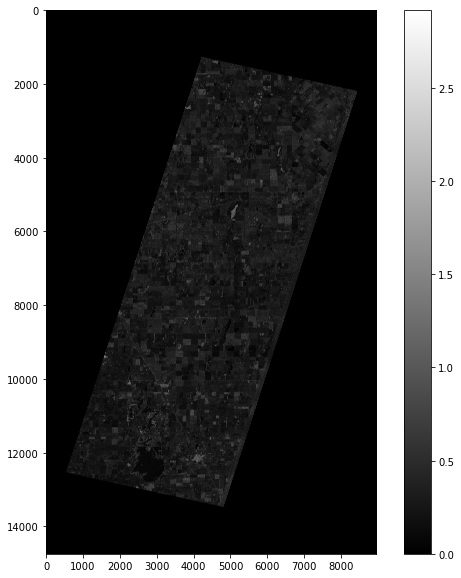

In [14]:
plt.figure(figsize = (10,10))
plt.imshow(im['bands']['RVI_EC'], 'gray')
plt.colorbar()

In [15]:
alto = len(im['bands']['RVI_EC'][:,0])
ancho = len(im['bands']['RVI_EC'][0,:])

In [16]:
altoInf = int(alto)

binario1 = np.zeros((altoInf,ancho))

aux = np.where((np.asarray(im['bands']['RVI_EC']) < 0.3) & (np.asarray(im['bands']['RVI_EC']) > 0))
binario1[aux[0],aux[1]] = 1

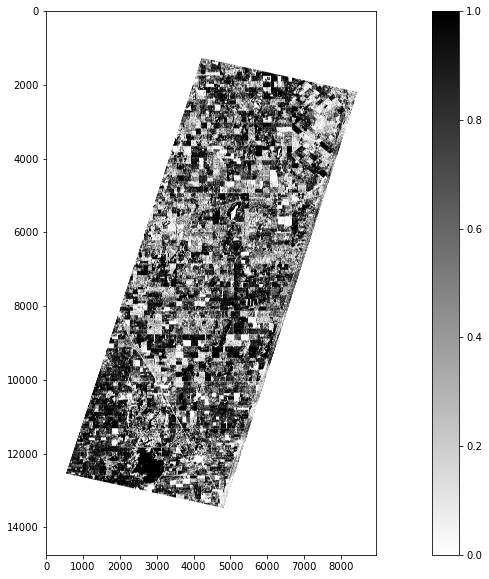

In [17]:
plt.figure(figsize=(20,10))
plt.imshow(binario1,'gray_r')
plt.colorbar()

In [18]:
tamaño = 5 #ventana para promedio (2*tamaño)+1 x (2*tamaño)+1
cota = 0.95 #cota del promedio

matrix1 = np.zeros((altoInf,ancho))

for i in range(tamaño,altoInf-tamaño):
    for j in range(tamaño,ancho-tamaño):
        # print(np.ndarray.mean(datos[90:99,90:99]))
        if (np.ndarray.mean(binario1[i-tamaño:i+tamaño,j-tamaño:j+tamaño]) > cota ):
            matrix1[i,j] = binario1[i,j]
    clear_output(wait=True)
    display(str(i*100/(altoInf-2*tamaño))[:5]+'%')

'100.0%'

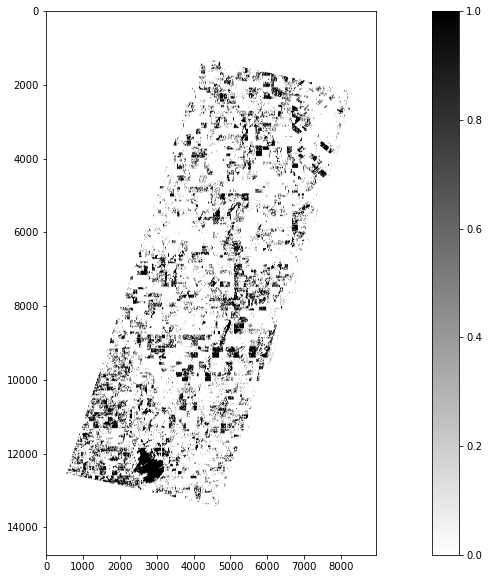

In [19]:
plt.figure(figsize=(20,10))
plt.imshow(matrix1,'gray_r')
plt.colorbar()
# plt.savefig('anguil_RVI_mascara.png', dpi=1000)

In [20]:
#CAMBIAR NOMBRE!!!!
np.savetxt('rvi/barrancosa2-0.95.txt',matrix1)

Refiltrado
--------

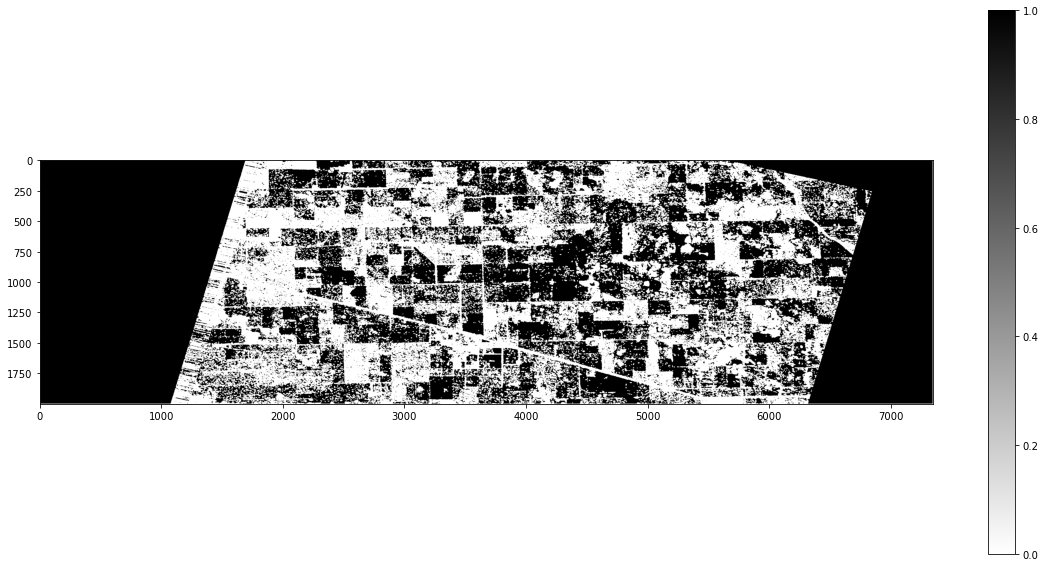

In [30]:
tamaño = 3
cota = 0.99

matrix1 = np.zeros((alto,ancho))

for i in range(tamaño,alto-tamaño):
    for j in range(tamaño,ancho-tamaño):
        # print(np.ndarray.mean(datos[90:99,90:99]))
        if (np.ndarray.mean(binario1[i-tamaño:i+tamaño,j-tamaño:j+tamaño]) > cota ):
            matrix1[i,j] = binario1[i,j]

plt.figure(figsize=(20,10))
plt.imshow(matrix1,'gray_r')
plt.colorbar()

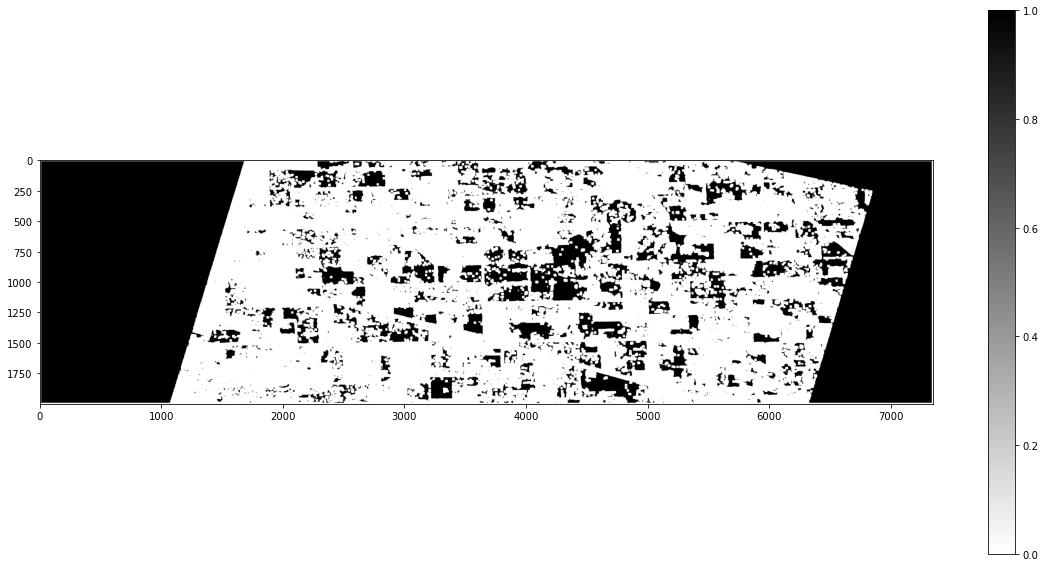

In [31]:
tamaño = 10
cota = 0.99

matrix1 = np.zeros((alto,ancho))

for i in range(tamaño,alto-tamaño):
    for j in range(tamaño,ancho-tamaño):
        # print(np.ndarray.mean(datos[90:99,90:99]))
        if (np.ndarray.mean(binario1[i-tamaño:i+tamaño,j-tamaño:j+tamaño]) > cota ):
            matrix1[i,j] = binario1[i,j]

plt.figure(figsize=(20,10))
plt.imshow(matrix1,'gray_r')
plt.colorbar()

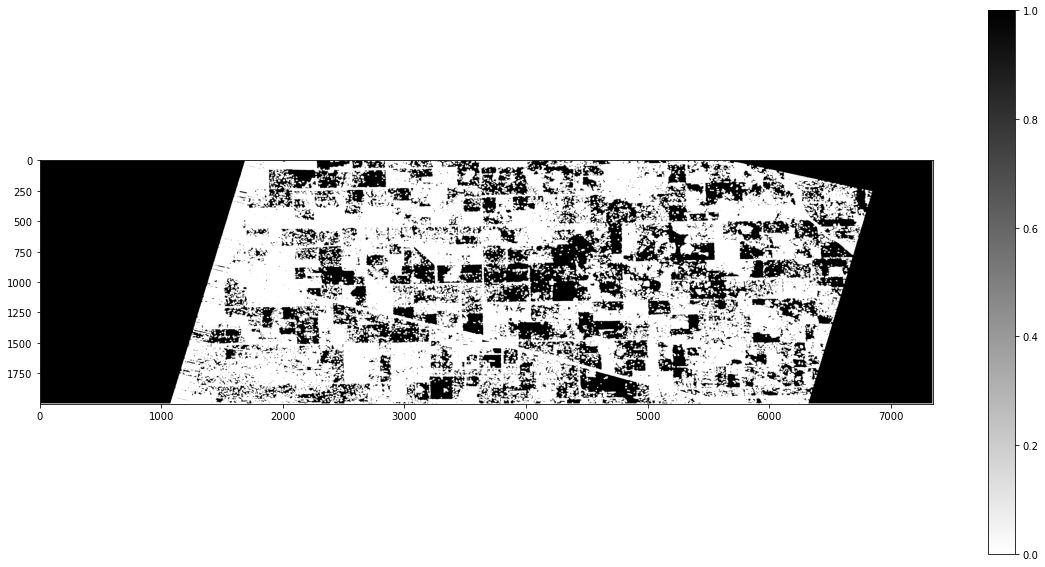

In [33]:
tamaño = 5
cota = 0.995

matrix1 = np.zeros((alto,ancho))

for i in range(tamaño,alto-tamaño):
    for j in range(tamaño,ancho-tamaño):
        # print(np.ndarray.mean(datos[90:99,90:99]))
        if (np.ndarray.mean(binario1[i-tamaño:i+tamaño,j-tamaño:j+tamaño]) > cota ):
            matrix1[i,j] = binario1[i,j]

plt.figure(figsize=(20,10))
plt.imshow(matrix1,'gray_r')
plt.colorbar()